In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
CensusDS=pd.read_csv('adulttest.csv')
CensusDS

,Age,Work Class,fnlwgt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours Per Week,Country,>50Kor<=50K
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [3]:
CensusDS.keys()

Index(['Age', ' Work Class', ' fnlwgt', ' Education', ' Education Num',
       ' Marital Status', ' Occupation', ' Relationship', ' Race', ' Gender',
       ' Capital Gain', ' Capital Loss', ' Hours Per Week', ' Country',
       ' >50Kor<=50K'],
      dtype='object')

In [4]:
CensusDS.shape

(16281, 15)

In [5]:
CensusDS.dtypes

Age                 int64
 Work Class        object
 fnlwgt             int64
 Education         object
 Education Num      int64
 Marital Status    object
 Occupation        object
 Relationship      object
 Race              object
 Gender            object
 Capital Gain       int64
 Capital Loss       int64
 Hours Per Week     int64
 Country           object
 >50Kor<=50K       object
dtype: object

In [6]:
CensusDS.describe()

,Age,fnlwgt,Education Num,Capital Gain,Capital Loss,Hours Per Week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [7]:
CensusDS.isnull().sum()

Age                0
 Work Class        0
 fnlwgt            0
 Education         0
 Education Num     0
 Marital Status    0
 Occupation        0
 Relationship      0
 Race              0
 Gender            0
 Capital Gain      0
 Capital Loss      0
 Hours Per Week    0
 Country           0
 >50Kor<=50K       0
dtype: int64

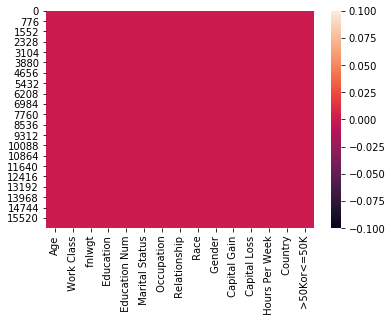

In [8]:
sns.heatmap(CensusDS.isnull())

In [9]:
CensusDS.columns

Index(['Age', ' Work Class', ' fnlwgt', ' Education', ' Education Num',
       ' Marital Status', ' Occupation', ' Relationship', ' Race', ' Gender',
       ' Capital Gain', ' Capital Loss', ' Hours Per Week', ' Country',
       ' >50Kor<=50K'],
      dtype='object')

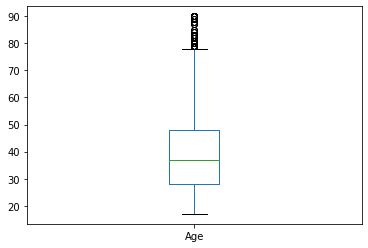

In [10]:
CensusDS['Age'].plot.box()

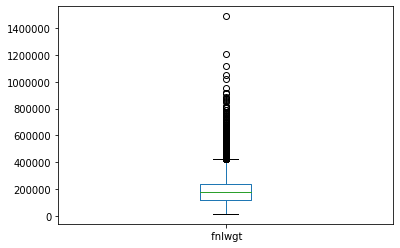

In [11]:
CensusDS[' fnlwgt'].plot.box()

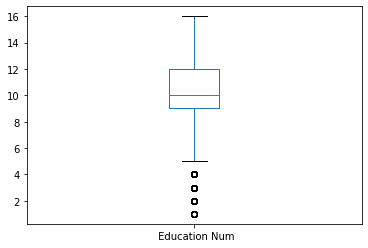

In [12]:
CensusDS[' Education Num'].plot.box()

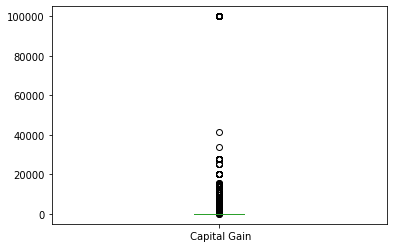

In [13]:
CensusDS[' Capital Gain'].plot.box()

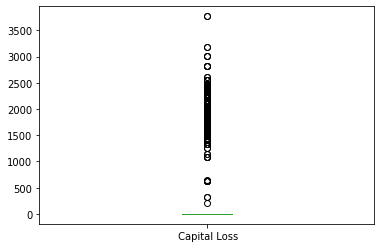

In [14]:
CensusDS[' Capital Loss'].plot.box()

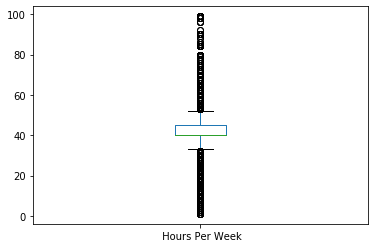

In [15]:
CensusDS[' Hours Per Week'].plot.box()

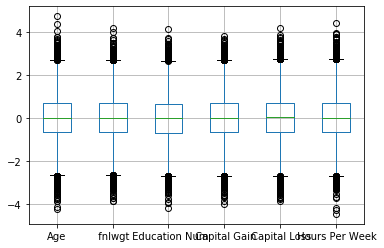

In [18]:
np.random.seed(6)
CensusDS = pd.DataFrame(np.random.randn(32560,6),
                        columns=['Age', ' fnlwgt', ' Education Num', ' Capital Gain',' Capital Loss',' Hours Per Week'])
boxplot = CensusDS.boxplot(column=['Age', ' fnlwgt', ' Education Num', ' Capital Gain',' Capital Loss',' Hours Per Week'])

to check the skewness

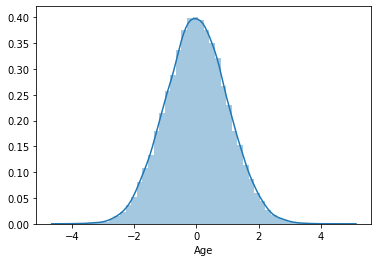

In [19]:
sns.distplot(CensusDS['Age'])

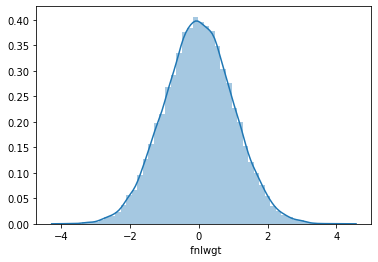

In [20]:
sns.distplot(CensusDS[' fnlwgt'])

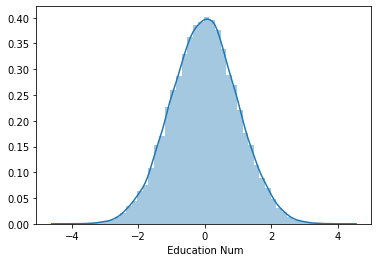

In [21]:
 sns.distplot(CensusDS[' Education Num'])

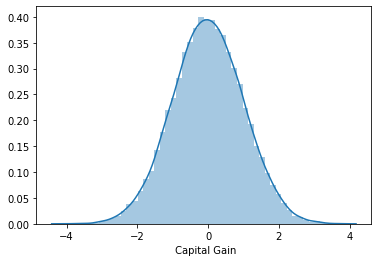

In [22]:
sns.distplot(CensusDS[' Capital Gain'])

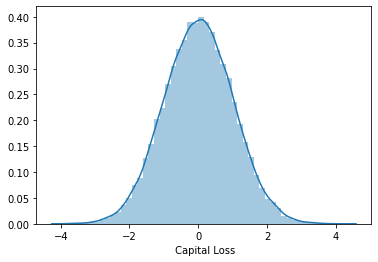

In [23]:
sns.distplot(CensusDS[' Capital Loss'])

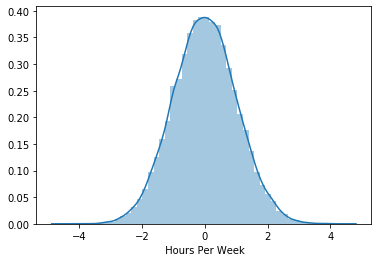

In [24]:
sns.distplot(CensusDS[' Hours Per Week'])

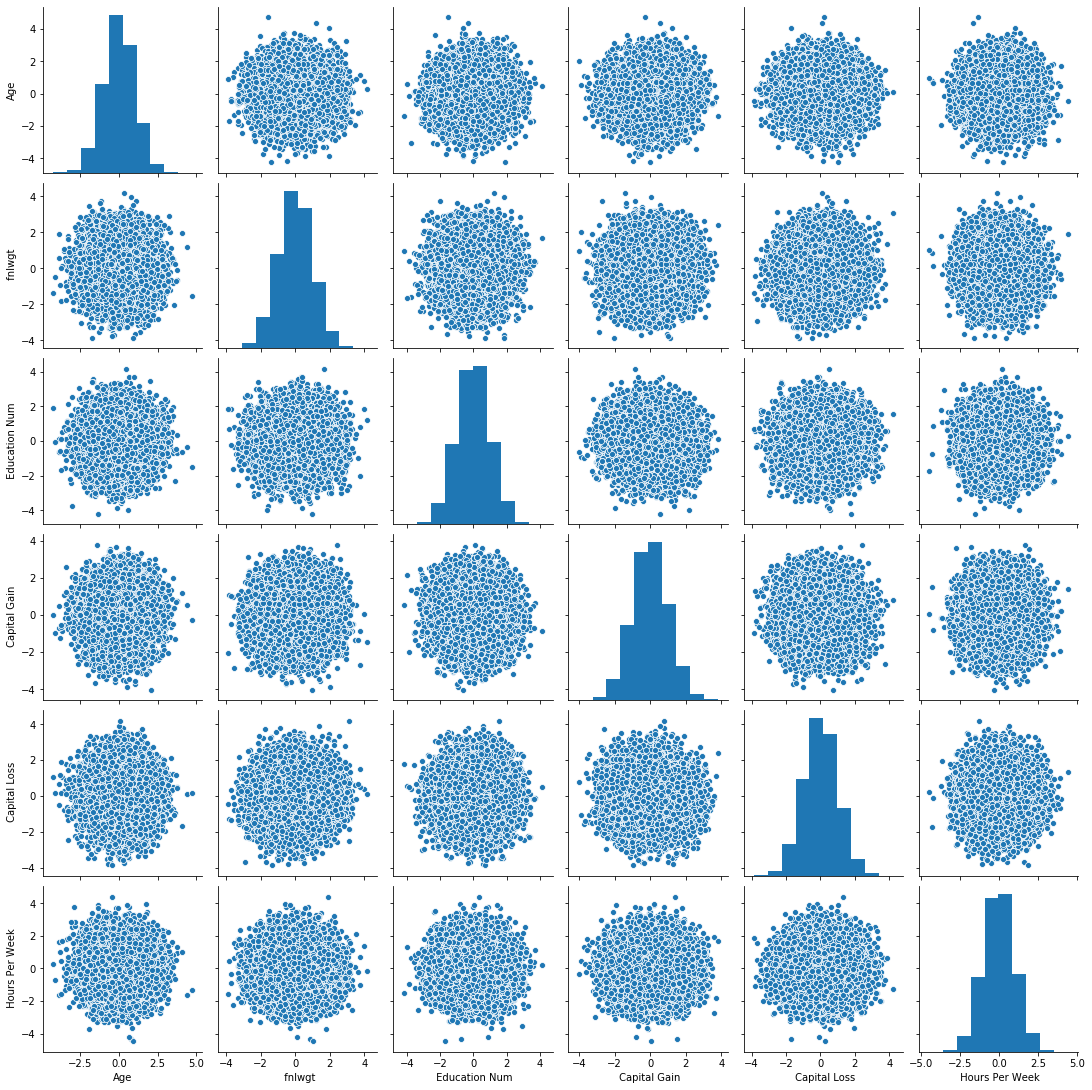

In [25]:
sns.pairplot(CensusDS)

In [26]:
# scipy.stats import zscore
#z=np.abs(zscore(CensusDS))
#z

In [27]:
#threshold=2
#print(np.where(z>2))

In [28]:
#z[1][4]

In [29]:
#z[1][0]

In [30]:
#z[0][5]

In [31]:
#z[1][5]

In [32]:
CensusDS[0:25]

,Age,fnlwgt,Education Num,Capital Gain,Capital Loss,Hours Per Week
0,-0.311784,0.729004,0.217821,-0.899092,-2.486781,0.913252
1,1.127064,-1.514093,1.639291,-0.429894,2.631281,0.601822
2,-0.335882,1.237738,0.111128,0.129151,0.076128,-0.155128
3,0.634225,0.810655,0.354809,1.812590,-1.356476,-0.463632
4,0.824654,-1.176431,1.564490,0.712705,-0.181007,0.534200
5,-0.586613,-1.481853,0.857248,0.943099,0.114441,-0.021957
6,-2.127145,-0.834407,-0.465508,0.233711,1.385035,-0.519627
7,-0.780152,0.955610,-0.126736,-1.368613,1.218481,-0.857501
8,-0.561471,-1.033520,0.358771,1.073681,-0.375505,0.396368
9,-0.471446,2.336608,1.502786,-0.595460,0.528341,0.939825


In [33]:
x=CensusDS.iloc[:,1:]

In [34]:
x

,fnlwgt,Education Num,Capital Gain,Capital Loss,Hours Per Week
0,0.729004,0.217821,-0.899092,-2.486781,0.913252
1,-1.514093,1.639291,-0.429894,2.631281,0.601822
2,1.237738,0.111128,0.129151,0.076128,-0.155128
3,0.810655,0.354809,1.812590,-1.356476,-0.463632
4,-1.176431,1.564490,0.712705,-0.181007,0.534200
...,...,...,...,...,...
32555,0.237815,2.453656,0.870005,-0.886446,-1.832683
32556,0.509583,-1.418475,0.895541,-2.348981,-0.095297
32557,-1.015337,-0.494007,0.249535,0.838954,-0.654007
32558,0.170157,0.053576,-0.366718,0.342821,-0.639355


In [35]:
x.shape

(32560, 5)

In [36]:
y=CensusDS.iloc[:,0].values
y

array([-0.31178367,  1.12706373, -0.33588161, ..., -1.54092643,
        1.81398822, -1.93336779])

In [37]:
y.shape

(32560,)

In [40]:
# adding dummies to the dataset
x = pd.get_dummies(x)
y = pd.get_dummies(y)
CesnsusDS= pd.get_dummies(CensusDS)
# limchiahooi/loan-approval-prediction from github only this part for refrence

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [39]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(t_test_predmnb))
print(clssification_report(y_test,predmnb))

ValueError: Unknown label type: (array([-0.58827359,  0.58458624, -1.42153298, ...,  0.09891196,
       -0.46070937,  1.50353318]),)

In [42]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

ValueError: Unknown label type: 'continuous'

In [43]:
#DescisionTreeClassifier(criterion=gini)
#DecisionTreeClassifier(criterion='entropy')
#Gini and entropy
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

ValueError: Unknown label type: 'continuous'

In [44]:
#k=10
dtc=KNeighborsClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classifiction_report(y_test,preddtc))

ValueError: Unknown label type: 'continuous'

In [45]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.sore(x_train,y_train)
predsvc=svc.predicst(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(lassifiation_report(y_test,predsvc))

ValueError: Unknown label type: 'continuous'

In [47]:
def svckernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_tedt,predsvc))

In [48]:
svmkernel('rbf')

NameError: name 'svmkernel' is not defined

In [49]:
svc('poly')

TypeError: 'SVC' object is not callable

In [ ]:
CensusDS=pd.DataFrame(predsvc)
CensusDS.to_csv('svc_Census.csv')